In [1]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import base64
import os
import time
import pydicom
import matplotlib.pyplot as plt
import numpy as np

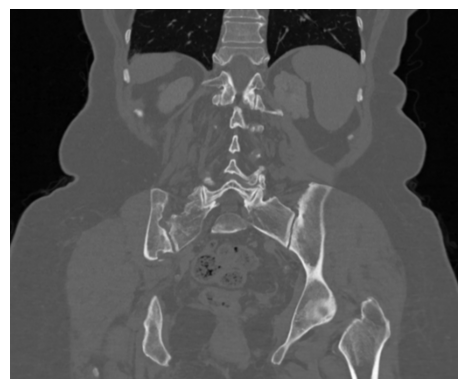

In [15]:
# ds = pydicom.dcmread(r"C:\Users\CarlosChinen\OneDrive\Main\FEI\TCC\Imagens DICOM\slice_218.dcm")
ds = pydicom.dcmread(r"C:\Users\CarlosChinen\OneDrive\Main\FEI\TCC\Criptografia\rsa_sha3\decrypt_metrics\imagem_descriptografada_299.dcm")

plt.imshow(ds.pixel_array, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
ds = pydicom.dcmread(r"C:\Users\CarlosChinen\OneDrive\Main\FEI\TCC\Imagens DICOM\slice_218.dcm")

rows = ds.Rows
columns = ds.Columns

print(f"Resolução da imagem: {columns} x {rows}")

Resolução da imagem: 512 x 423


# ECC

Iniciando criptografia ECC: arquivo 218
Assinatura ECC finalizada: arquivo 218
Tempo de execução: 0.00889 segundos


Tempo médio de execução: 0.00889


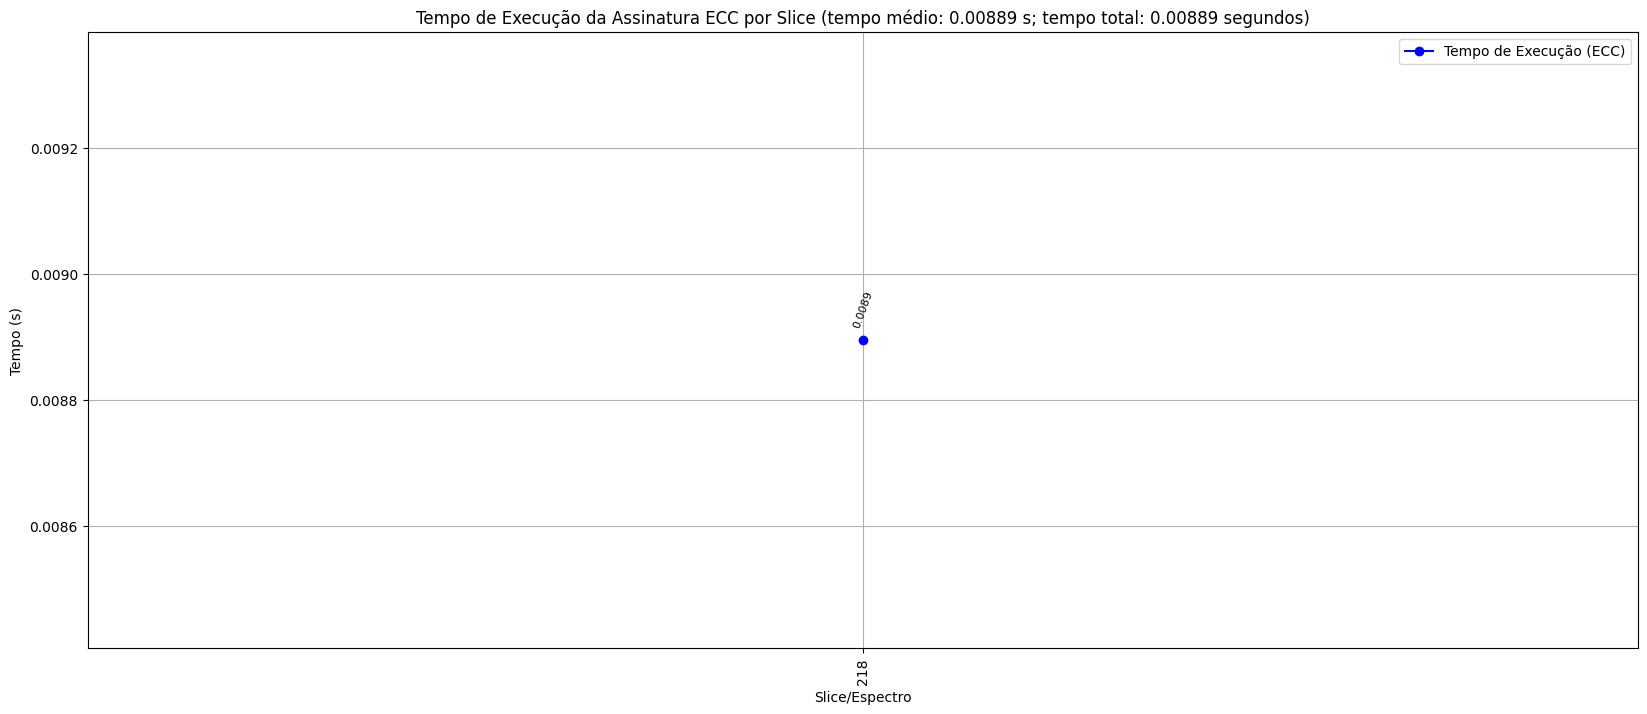

In [ ]:
from Crypto.PublicKey import ECC
from Crypto.Signature import DSS
from Crypto.Hash import SHA256
import time
import numpy as np
import matplotlib.pyplot as plt

# Geração das chaves ECC
key = ECC.generate(curve='P-256')
private_key = key
public_key = key.public_key()

with open("ecc_private.pem", "wt") as f:
    f.write(private_key.export_key(format='PEM'))

with open("ecc_public.pem", "wt") as f:
    f.write(public_key.export_key(format='PEM'))

tempos_execucao = []
execucoes = []

for rodagem in range(218, 300):
    inicio = time.perf_counter()
    print(f'Iniciando criptografia ECC: arquivo {rodagem}')

    dicom_path = f'C:\\Users\\CarlosChinen\\OneDrive\\Main\\FEI\\TCC\\Criptografia\\criptografia\\dicom_fourier_spectrum_dataset\\spectrum_slice_{rodagem}.png'

    with open(dicom_path, "rb") as dicom_file:
        image_data = dicom_file.read()

    # Em vez de criptografar a imagem, geramos um hash e assinamos com ECC
    hash_obj = SHA256.new(image_data)
    signer = DSS.new(private_key, 'fips-186-3')
    signature = signer.sign(hash_obj)

    # Armazena a assinatura e o hash da imagem
    with open(f"ECC_crypto_spectrum_metrics/ECC_spectrum_assinado_{rodagem}.sig", "wb") as out_file:
        out_file.write(signature)

    fim = time.perf_counter()
    tempo_execucao = fim - inicio
    tempos_execucao.append(tempo_execucao)
    execucoes.append(rodagem)

    print(f'Assinatura ECC finalizada: arquivo {rodagem}')
    print(f"Tempo de execução: {tempo_execucao:.5f} segundos\n")

print(f'\nTempo médio de execução: {np.mean(tempos_execucao):.5f}')

plt.figure(figsize=(20, 8))
plt.plot(execucoes, tempos_execucao, marker='o', linestyle='-', color='blue', label='Tempo de Execução (ECC)')

for x, y in zip(execucoes, tempos_execucao):
    plt.text(x, y + 0.00005, f'{y:.4f}', ha='center', va='center', fontsize=8, rotation=70)

plt.xticks(execucoes, rotation=90)
plt.xlabel('Slice/Espectro')
plt.ylabel('Tempo (s)')
plt.title(f'Tempo de Execução da Assinatura ECC por Slice (tempo médio: {np.mean(tempos_execucao):.5f} s; tempo total: {np.sum(tempos_execucao):.5f} segundos)')
plt.legend()
plt.grid(True)
plt.savefig('output_images/graph_tempo_execucao_ecc_assinatura_espectro.png')
plt.show()


# AES

Iniciando criptografia AES: arquivo 218
Criptografia AES finalizada: arquivo 218
Tempo de execução: 0.00361 segundos

Iniciando criptografia AES: arquivo 219
Criptografia AES finalizada: arquivo 219
Tempo de execução: 0.01663 segundos

Iniciando criptografia AES: arquivo 220
Criptografia AES finalizada: arquivo 220
Tempo de execução: 0.00962 segundos

Iniciando criptografia AES: arquivo 221
Criptografia AES finalizada: arquivo 221
Tempo de execução: 0.00930 segundos

Iniciando criptografia AES: arquivo 222
Criptografia AES finalizada: arquivo 222
Tempo de execução: 0.00968 segundos

Iniciando criptografia AES: arquivo 223
Criptografia AES finalizada: arquivo 223
Tempo de execução: 0.00893 segundos

Iniciando criptografia AES: arquivo 224
Criptografia AES finalizada: arquivo 224
Tempo de execução: 0.01017 segundos

Iniciando criptografia AES: arquivo 225
Criptografia AES finalizada: arquivo 225
Tempo de execução: 0.00873 segundos

Iniciando criptografia AES: arquivo 226
Criptografia AES

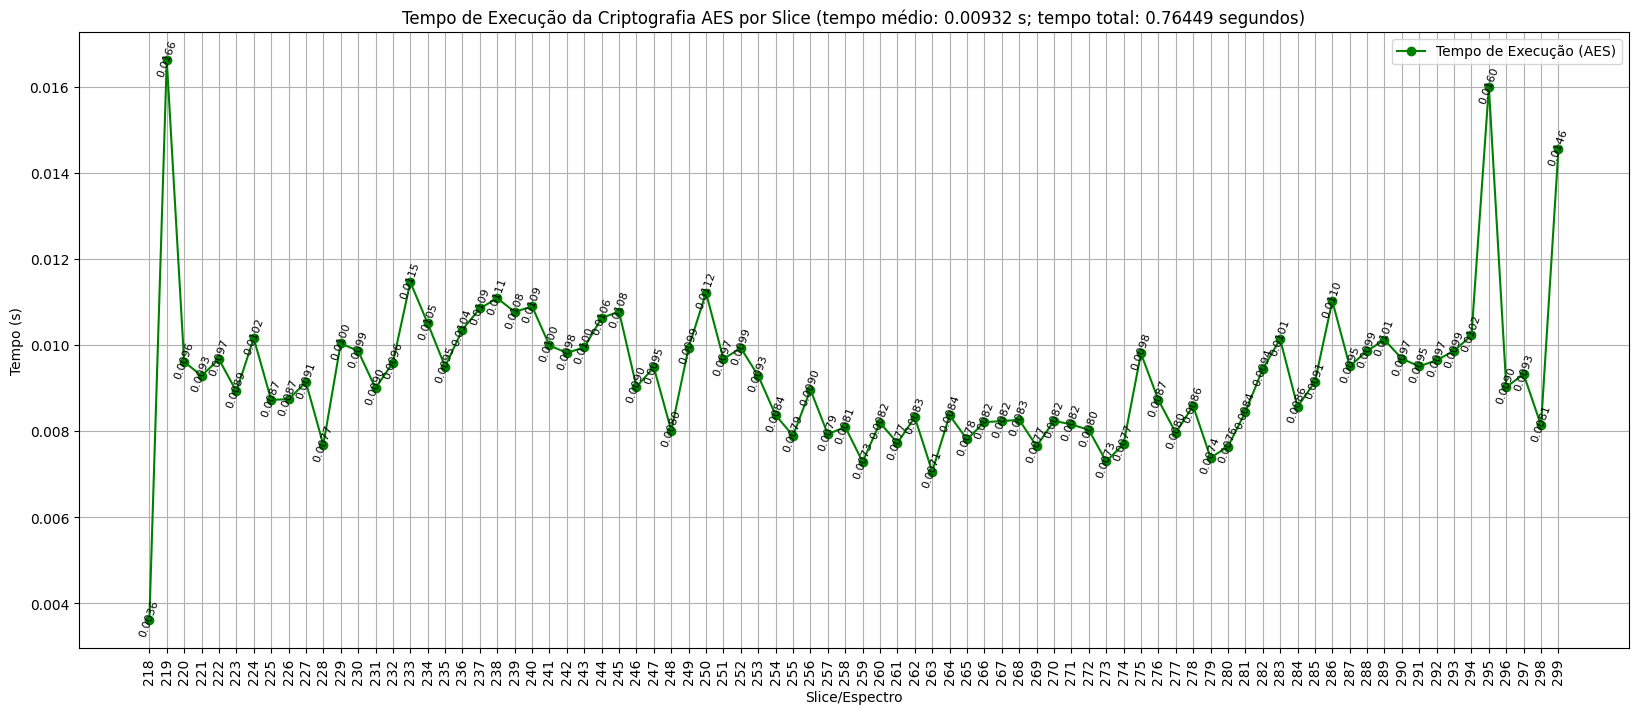

In [2]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import time
import numpy as np
import matplotlib.pyplot as plt
import os

# Geração da chave AES (256 bits)
aes_key = get_random_bytes(32)  # 32 bytes = 256 bits

# Salva a chave AES para uso posterior (criptografia simétrica)
with open("aes_key.bin", "wb") as key_file:
    key_file.write(aes_key)

tempos_execucao = []
execucoes = []

for rodagem in range(218, 300):
    inicio = time.perf_counter()
    print(f'Iniciando criptografia AES: arquivo {rodagem}')

    dicom_path = f'C:\\Users\\CarlosChinen\\OneDrive\\Main\\FEI\\TCC\\Criptografia\\criptografia\\dicom_fourier_spectrum_dataset\\spectrum_slice_{rodagem}.png'

    with open(dicom_path, "rb") as dicom_file:
        image_data = dicom_file.read()

    # Criptografia AES no modo EAX
    cipher_aes = AES.new(aes_key, AES.MODE_EAX)
    ciphertext, tag = cipher_aes.encrypt_and_digest(image_data)

    # Salva: nonce, tag e dados criptografados
    os.makedirs("AES_crypto_spectrum_metrics", exist_ok=True)
    with open(f"AES_crypto_spectrum_metrics/AES_spectrum_criptografado_{rodagem}.enc", "wb") as out_file:
        out_file.write(cipher_aes.nonce)
        out_file.write(tag)
        out_file.write(ciphertext)

    fim = time.perf_counter()
    tempo_execucao = fim - inicio
    tempos_execucao.append(tempo_execucao)
    execucoes.append(rodagem)

    print(f'Criptografia AES finalizada: arquivo {rodagem}')
    print(f"Tempo de execução: {tempo_execucao:.5f} segundos\n")

print(f'\nTempo médio de execução: {np.mean(tempos_execucao):.5f}')

plt.figure(figsize=(20, 8))
plt.plot(execucoes, tempos_execucao, marker='o', linestyle='-', color='green', label='Tempo de Execução (AES)')

for x, y in zip(execucoes, tempos_execucao):
    plt.text(x, y + 0.00005, f'{y:.4f}', ha='center', va='center', fontsize=8, rotation=70)

plt.xticks(execucoes, rotation=90)
plt.xlabel('Slice/Espectro')
plt.ylabel('Tempo (s)')
plt.title(f'Tempo de Execução da Criptografia AES por Slice (tempo médio: {np.mean(tempos_execucao):.5f} s; tempo total: {np.sum(tempos_execucao):.5f} segundos)')
plt.legend()
plt.grid(True)
plt.savefig('output_images/graph_tempo_execucao_aes_criptografia_espectro.png')
plt.show()
